In [1]:
pwd

'/Users/ritatojeiro/Dropbox/Paper_stuff/Code'

In [2]:
cd '../GAMA_runs'

/Users/ritatojeiro/Dropbox/Paper_stuff/GAMA_runs


In [10]:
%matplotlib inline

/Users/ritatojeiro/Dropbox/Paper_stuff/Code/GAMA/MyPlots/ScaleComp_Mstar_scatter.pdf
/Users/ritatojeiro/Dropbox/Paper_stuff/Code/GAMA/MyPlots/ScaleComp_Mstar_hist.pdf
/Users/ritatojeiro/Dropbox/Paper_stuff/Code/GAMA/MyPlots/ScaleComp_MWA_hist.pdf


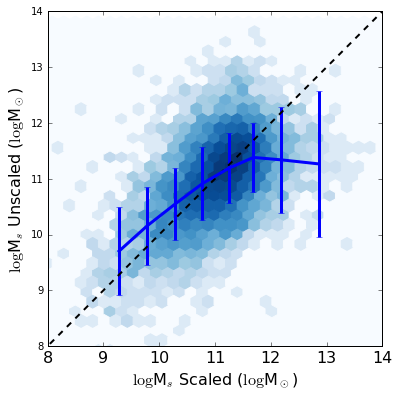

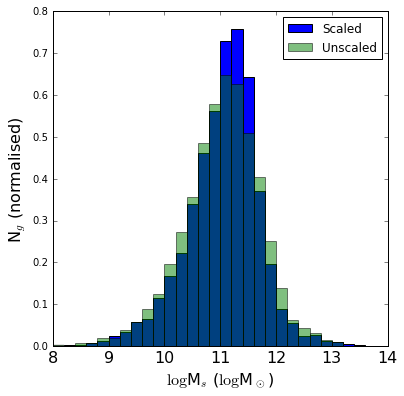

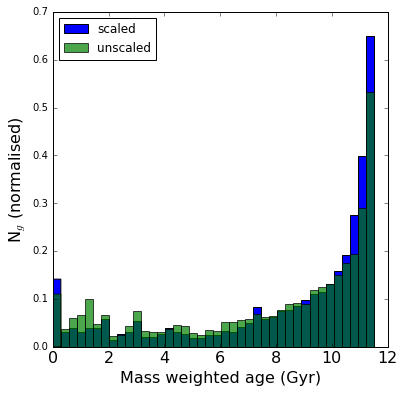

In [134]:
run compare_scaling

(array([    0.,    17.,   512.,  1289.,  1311.,   876.,   606.,   435.,
          284.,   238.,   207.,   117.,   113.,    99.,   107.,    65.,
           48.,    43.,    54.,    33.,    33.,    39.,    30.,    28.,
           25.,    23.,    18.,    23.,    26.,    22.,    17.,    18.,
           15.,    22.,    11.,    10.,     8.,     8.,    12.,    13.]),
 array([ 0.5   ,  0.5625,  0.625 ,  0.6875,  0.75  ,  0.8125,  0.875 ,
         0.9375,  1.    ,  1.0625,  1.125 ,  1.1875,  1.25  ,  1.3125,
         1.375 ,  1.4375,  1.5   ,  1.5625,  1.625 ,  1.6875,  1.75  ,
         1.8125,  1.875 ,  1.9375,  2.    ,  2.0625,  2.125 ,  2.1875,
         2.25  ,  2.3125,  2.375 ,  2.4375,  2.5   ,  2.5625,  2.625 ,
         2.6875,  2.75  ,  2.8125,  2.875 ,  2.9375,  3.    ]),
 <a list of 40 Patch objects>)

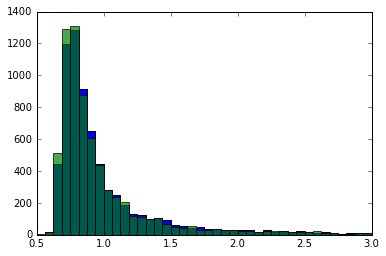

In [149]:
plt.hist(df[(df.Mstar_x > 8) & (df.Mstar_y > 8)].chi2_x, bins=40, range=(0.5,3))
plt.hist(df[(df.Mstar_x > 8) & (df.Mstar_y > 8)].chi2_y, bins=40, range=(0.5,3), alpha=0.7)

In [129]:
df.specID

0       G09_Y1_AN1_020
1       G09_Y1_AN1_034
2       G09_Y1_AN1_056
3       G09_Y1_AN1_068
4       G09_Y1_AN1_075
5       G09_Y1_AN1_076
6       G09_Y1_AN1_077
7       G09_Y1_AN1_079
8       G09_Y1_AN1_084
9       G09_Y1_AN1_085
10      G09_Y1_AN1_135
11      G09_Y1_AN1_136
12      G09_Y1_AN1_155
13      G09_Y1_AN1_157
14      G09_Y1_AN1_176
15      G09_Y1_AN1_193
16      G09_Y1_AN1_203
17      G09_Y1_AN1_213
18      G09_Y1_AN1_220
19      G09_Y1_AN1_234
20      G09_Y1_AN1_236
21      G09_Y1_AN1_252
22      G09_Y1_AN1_261
23      G09_Y1_AN1_310
24      G09_Y1_AN1_315
25      G09_Y1_AN1_318
26      G09_Y1_AN1_322
27      G09_Y1_AN1_324
28      G09_Y1_AN1_347
29      G09_Y1_AN1_365
             ...      
7291    G15_Y6_100_157
7292    G15_Y6_100_177
7293    G15_Y6_100_195
7294    G15_Y6_100_211
7295    G15_Y6_100_282
7296    G15_Y6_100_283
7297    G15_Y6_100_289
7298    G15_Y6_100_290
7299    G15_Y6_100_369
7300    G15_Y6_100_382
7301    G15_Y6_101_072
7302    G15_Y6_101_087
7303    G15

(array([  8.,   9.,  10.,  11.,  12.,  13.,  14.]),
 <a list of 7 Text xticklabel objects>)

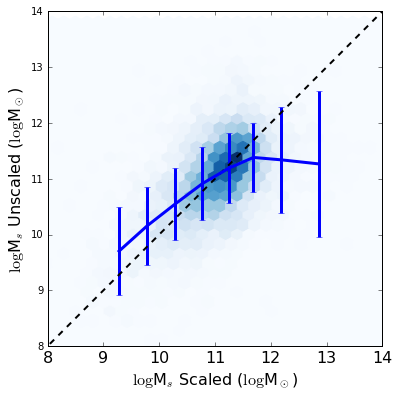

In [66]:
brange = np.arange(8) * 0.5 + 9
groups_p = df.groupby(np.digitize(df.Mstar_x, brange))    #grouping by model quantity above a min value        
plt.figure(figsize=(6,6))
fs=16
plt.hexbin(df.Mstar_x, df.Mstar_y, cmap='Blues', bins='log', gridsize=70)
plt.plot([0,20],[0,20], color='black', lw=2, ls='dashed')
plt.ylim(8,14)
plt.xlim(8,14)
x = groups_p.Mstar_x.mean()
y = groups_p.Mstar_y.mean()
sig = groups_p.Mstar_y.std()
plt.errorbar(np.array(x[1:]),np.array(y[1:]) , yerr = np.array(sig[1:]), lw=3, color='Blue')
plt.xlabel('$\log$M$_s$ Scaled ($\log$M$_\odot$)', fontsize=fs)
plt.ylabel('$\log$M$_s$ Unscaled ($\log$M$_\odot$)', fontsize=fs)
plt.xticks(fontsize=fs)
plt.xticks(fontsize=fs)

In [121]:
df[(df.Mstar_x > 8) & (df.Mstar_y > 8)].massAge_y.mean()


8.059757200829415

In [123]:
Res = df[(df.Mstar_x > 8) & (df.Mstar_y > 8)].massAge_x - df[(df.Mstar_x > 8) & (df.Mstar_y > 8)].massAge_y
Res.mean()

0.6297401529512583

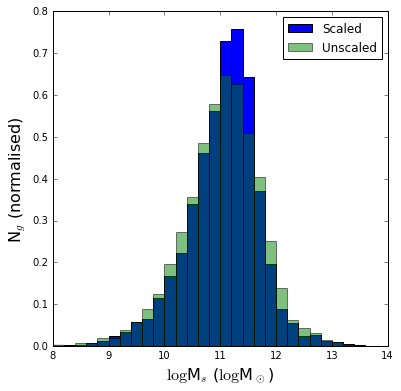

In [105]:
plt.figure(figsize=(6,6))
plt.hist(df.Mstar_x, bins=30, range=(8,14), label='Scaled', normed=True)
plt.hist(df.Mstar_y, bins=30, range=(8,14), alpha=0.5, label='Unscaled', normed=True, color='green')
plt.legend()
plt.xlabel('$\log$M$_s$ ($\log$M$_\odot$)', fontsize=fs)
plt.ylabel('N$_g$ (normalised)', fontsize=fs)
plt.xticks(fontsize=fs)
plt.xticks(fontsize=fs)

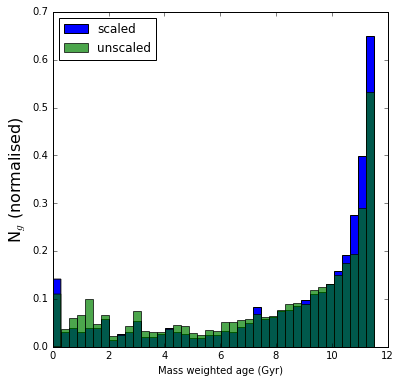

In [106]:
plt.figure(figsize=(6,6))
plt.hist(df.massAge_x, bins=40, range=(0,11.5), label='scaled', normed=True)
plt.hist(df.massAge_y, bins=40, range=(0,11.5), alpha=0.7, label='unscaled', normed=True)
plt.legend(loc='upper left')
plt.xlabel('Mass weighted age (Gyr)')
plt.ylabel('N$_g$ (normalised)', fontsize=fs)
plt.xticks(fontsize=fs)
plt.xticks(fontsize=fs)

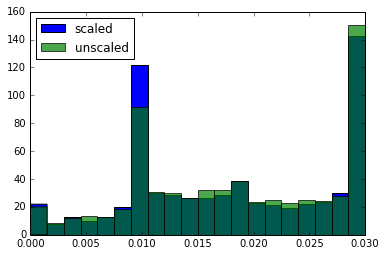

In [90]:
plt.hist(df.massZ_x, bins=20, label='scaled', normed=True)
plt.hist(df.massZ_y, bins=20, alpha=0.7, label='unscaled', normed=True)
plt.legend(loc='upper left')

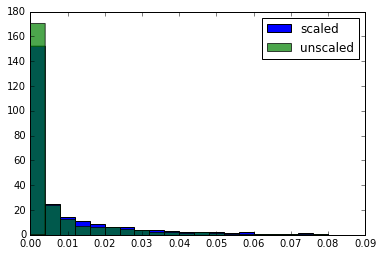

In [99]:
plt.hist(df.youngFrac_x, bins=20, label='scaled', normed=True, range=(0,0.08))
plt.hist(df.youngFrac_y, bins=20, alpha=0.7, label='unscaled', normed=True,range=(0,0.08))
plt.legend(loc='upper right')

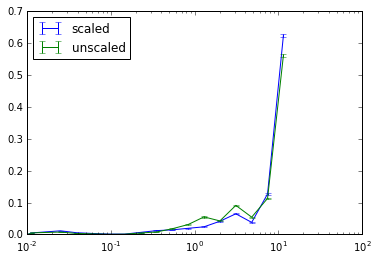

In [164]:
SFH_sc = pd.read_csv('average_SFF_Scaled_spec.txt', header=0)
SFH_unsc = pd.read_csv('average_SFF_UNScaled_spec.txt', header=0)
plt.errorbar(SFH_sc.age, SFH_sc.SFF, yerr=SFH_sc.SFF_error, label='scaled')
plt.errorbar(SFH_unsc.age, SFH_unsc.SFF,yerr=SFH_unsc.SFF_error, label='unscaled')
#plt.yscale('log')
plt.xscale('log')
plt.legend(loc='upper left')



In [152]:
SFH_sc

age       SFF  SFF_error
0    0.0110  0.004697   0.000554
1    0.0250  0.011469   0.000904
2    0.0390  0.005437   0.000501
3    0.0610  0.003120   0.000379
4    0.0945  0.001292   0.000209
5    0.1460  0.001226   0.000260
6    0.2260  0.006544   0.000592
7    0.3500  0.012062   0.000889
8    0.5415  0.014490   0.000861
9    0.8390  0.019381   0.001157
10   1.2950  0.024011   0.001289
11   2.0050  0.041444   0.001738
12   3.1100  0.064842   0.002189
13   4.8100  0.037910   0.001706
14   7.4400  0.127135   0.002804
15  11.5200  0.624942   0.004479